<a href="https://colab.research.google.com/github/msribeiror29/Bibliotecas_Pandas/blob/main/CaseII__Analisando_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O contexto do caso é: um cliente está buscando um apartamento para alugar com as seguintes premissas:


Custo máximo: R$4.000
Localização: Barcelona ou Porto
Quartos: 2 ou 3
Aceita animais
Melhor custo-benefício possível

O objetivo é encontrar o apartamento que melhor atende essas premissas.

Serão abordados conceitos como:


  -Importação e análise exploratória de dados

  -Filtragem e refinamento de dados

  -Análise de dados utilizando Python

  -Visualização de dados

  -Tomada de decisão com base em insights

O objetivo é demonstrar na prática como a análise de dados pode ajudar a tomar decisões de negócio, neste caso, decidir qual o melhor apartamento para se alugar.

In [ ]:
import pandas as pd


In [ ]:
rent_house = pd.read_excel('/content/houses_rent.xlsx')

## Limpeza e Tratamento dos Dados

Antes de partir para a análise, precisamos garantir que os dados estão limpos e tratados. Isso envolve lidar com valores ausentes e dados inconsistentes.


Verificando as primeiras e últimas linhas, conseguimos ter uma noção melhor dos dados contidos na base.

In [ ]:
rent_house.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


Podemos ver rapidamente se há valores ausentes com o método `isnull()`:

In [ ]:
rent_house.tail()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
6075,6075,Barcelona,50,2,1,1,2,accept,not furnished,420,1150,0,15,1585
6076,6076,Barcelona,84,2,2,1,16,not accept,furnished,768,2900,63,37,3768
6077,6077,Porto,48,1,1,0,13,accept,not furnished,250,950,42,13,1255
6078,6078,Barcelona,160,3,2,2,-,not accept,not furnished,0,3500,250,53,3803
6079,6079,Barcelona,60,2,1,1,4,accept,furnished,489,1900,0,25,2414


Manipulando os dados

In [ ]:
rent_house = rent_house.rename(columns = {'parking spaces':'parking_space', 'rent amount':'rent_amount', 'property tax':'property_tax',
                                           'fire insurance':'fire_insurance'})

In [ ]:
rent_house.head()

,index,city,area,rooms,bathroom,parking_space,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


Analisando os tipos de dados

In [ ]:
rent_house.dtypes

index              int64
city              object
area               int64
rooms              int64
bathroom           int64
parking_space      int64
floor             object
animal            object
furniture         object
hoa               object
rent_amount        int64
property_tax       int64
fire_insurance     int64
total              int64
dtype: object

Caso encontremos inconsistências, será necessário converter os dados para o tipo correto ou descartá-los.


In [ ]:
rent_house = rent_house.astype({"rent_amount":"float", "property_tax":"float", "fire_insurance": "float", "total": "float"})
rent_house.dtypes

index               int64
city               object
area                int64
rooms               int64
bathroom            int64
parking_space       int64
floor              object
animal             object
furniture          object
hoa                object
rent_amount       float64
property_tax      float64
fire_insurance    float64
total             float64
dtype: object

In [ ]:
rent_house.head()

,index,city,area,rooms,bathroom,parking_space,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000.0,1000.0,121.0,9121.0
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000.0,1417.0,89.0,12680.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200.0,41.0,16.0,1257.0


Começando com métricas Estátisticas.



In [ ]:
rent_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6080 non-null   int64  
 1   city            6080 non-null   object 
 2   area            6080 non-null   int64  
 3   rooms           6080 non-null   int64  
 4   bathroom        6080 non-null   int64  
 5   parking_space   6080 non-null   int64  
 6   floor           6080 non-null   object 
 7   animal          6080 non-null   object 
 8   furniture       6080 non-null   object 
 9   hoa             6080 non-null   object 
 10  rent_amount     6080 non-null   float64
 11  property_tax    6080 non-null   float64
 12  fire_insurance  6080 non-null   float64
 13  total           6080 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 665.1+ KB



Selecionando colunas numéricas para análise estatística

In [ ]:
rent_house[['area','rooms', 'bathroom', 'parking_space', 'rent_amount', 'property_tax', 'fire_insurance', 'total']]

,area,rooms,bathroom,parking_space,rent_amount,property_tax,fire_insurance,total
0,240,3,3,4,8000.0,1000.0,121.0,9121.0
1,64,2,1,1,820.0,122.0,11.0,1493.0
2,443,5,5,4,7000.0,1417.0,89.0,12680.0
3,73,2,2,1,1250.0,150.0,16.0,2116.0
4,19,1,1,0,1200.0,41.0,16.0,1257.0
...,...,...,...,...,...,...,...,...
6075,50,2,1,1,1150.0,0.0,15.0,1585.0
6076,84,2,2,1,2900.0,63.0,37.0,3768.0
6077,48,1,1,0,950.0,42.0,13.0,1255.0
6078,160,3,2,2,3500.0,250.0,53.0,3803.0


Fazendo analise descritiva

In [ ]:
rent_house[['area','rooms', 'bathroom', 'parking_space', 'rent_amount', 'property_tax', 'fire_insurance', 'total']].describe()

,area,rooms,bathroom,parking_space,rent_amount,property_tax,fire_insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,151.143914,2.492599,2.341612,1.756250,4395.844408,490.533224,58.204276,6033.194572
std,375.559485,1.129665,1.438860,1.611909,3576.668946,6212.549484,49.313441,8751.347700
min,10.000000,1.000000,1.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,58.000000,2.000000,1.000000,1.000000,1800.000000,34.000000,23.000000,2451.500000
50%,100.000000,3.000000,2.000000,1.000000,3111.000000,145.000000,41.000000,4128.500000
75%,200.000000,3.000000,3.000000,2.000000,5952.500000,458.000000,77.000000,8074.000000
max,24606.000000,10.000000,10.000000,12.000000,45000.000000,366300.000000,677.000000,372700.000000


Filtando os dados parteI, Premissa1 : partindo de um budge de valor de aluguel de ate 4000 euros, eu tenho animal e e dois filhos

In [ ]:
rent_house = rent_house[(rent_house["total"]<=4000) &
                        (rent_house["animal"] == "accept") &
                        ((rent_house["rooms"]==2) | (rent_house["rooms"]==3))]
rent_house.head()

,index,city,area,rooms,bathroom,parking_space,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


In [ ]:
rent_house.describe()

,index,area,rooms,bathroom,parking_space,rent_amount,property_tax,fire_insurance,total
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,3003.132907,100.432836,2.379531,1.653873,1.212509,1964.006397,95.678749,25.899787,2556.358209
std,1739.608911,340.999109,0.485443,0.745034,0.973862,692.152422,107.359160,11.078694,783.028975
min,1.000000,30.000000,2.000000,1.000000,0.000000,450.000000,0.000000,5.000000,843.000000
25%,1453.000000,60.000000,2.000000,1.000000,1.000000,1445.500000,1.500000,17.000000,1962.500000
50%,3001.000000,76.000000,2.000000,2.000000,1.000000,1900.000000,67.000000,25.000000,2507.000000
75%,4518.500000,100.000000,3.000000,2.000000,2.000000,2450.000000,144.000000,32.000000,3181.500000
max,6079.000000,12732.000000,3.000000,6.000000,8.000000,3915.000000,791.000000,59.000000,3998.000000


Filtrando os dados parteII with .query

In [ ]:
rent_house = rent_house.query("total <=4000 and animal == 'accept'")

In [ ]:
rent_house.head()

,index,city,area,rooms,bathroom,parking_space,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


In [ ]:
rent_house = rent_house.query(("total <= 4000 and animal == 'accept'  and rooms ==2 or rooms ==3"))

In [ ]:
rent_house.head()

,index,city,area,rooms,bathroom,parking_space,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


Agrupando Dados

In [ ]:
agg_city_price = rent_house.groupby(["city"])['total'].agg('mean').reset_index()
agg_city_price

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


In [ ]:
agg_bath_room_price = rent_house.groupby(['bathroom','rooms']) ['total'].agg('mean').reset_index()
agg_bath_room_price

,bathroom,rooms,total
0,1,2,2091.175221
1,1,3,2542.509091
2,2,2,2734.612903
3,2,3,2928.720395
4,3,2,3057.440000
5,3,3,3217.704545
6,4,2,3136.000000
7,4,3,3461.133333
8,5,3,3245.000000
9,6,3,3101.000000


Visualização

Um dos gráficos mais simples mas também mais úteis para visualizar dados é o gráfico de barras. Ele permite comparar valores entre diferentes categorias.

Por exemplo, vamos plotar um gráfico de barras com a quantidade média de quartos vs o preço médio:

In [ ]:
import seaborn as sns

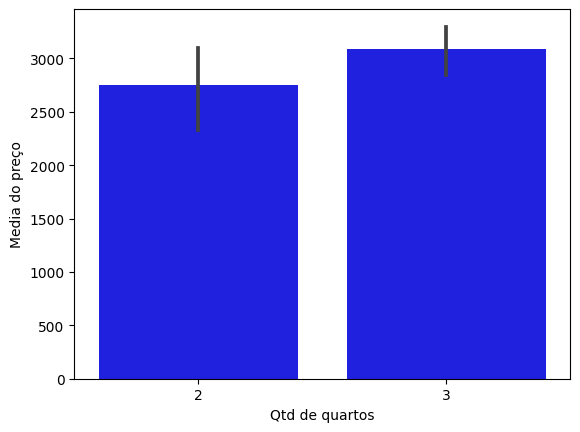

In [ ]:
ax = sns.barplot(data = agg_bath_room_price, x='rooms', y='total', color = "blue");
ax.set (xlabel = 'Qtd de quartos', ylabel = 'Media do preço');

Desta forma conseguimos visualizar rapidamente que, quanto mais quartos, maior tende a ser o preço médio do imóvel. Isso facilita nossa análise e interpretação dos dados.

Podemos customizar vários elementos do gráfico, como as cores:

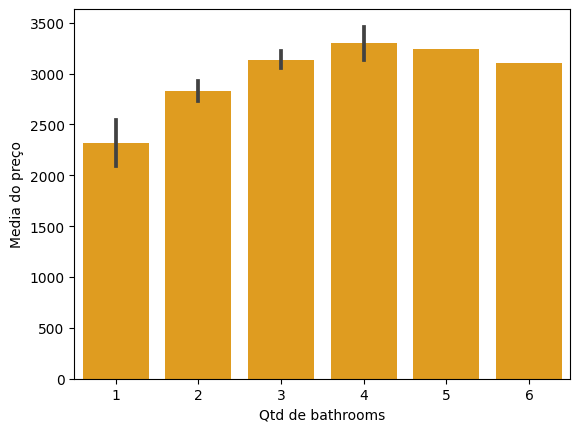

In [ ]:
ax = sns.barplot(data = agg_bath_room_price, x='bathroom', y='total', color = "orange");
ax.set (xlabel = 'Qtd de bathrooms', ylabel = 'Media do preço');

In [ ]:
agg_area = rent_house [['area']]
agg_area = agg_area.query("area<=100")
agg_area.describe()

,area
count,1064.000000
mean,69.641917
std,15.962461
min,30.000000
25%,57.000000
50%,69.000000
75%,80.000000
max,100.000000


Histograma

Outro tipo muito útil de gráfico é o histograma. Ele mostra a distribuição de frequência de uma variável.

Por exemplo, podemos plotar um histograma da distribuição da área dos imóveis:

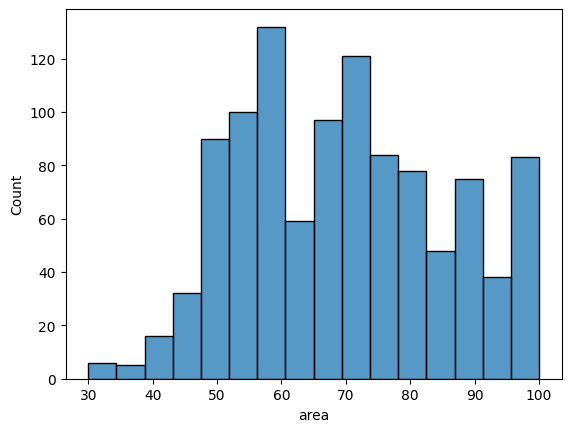

In [ ]:
sns.histplot (data = agg_area, x = "area");

In [ ]:
agg_city_price.head()

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


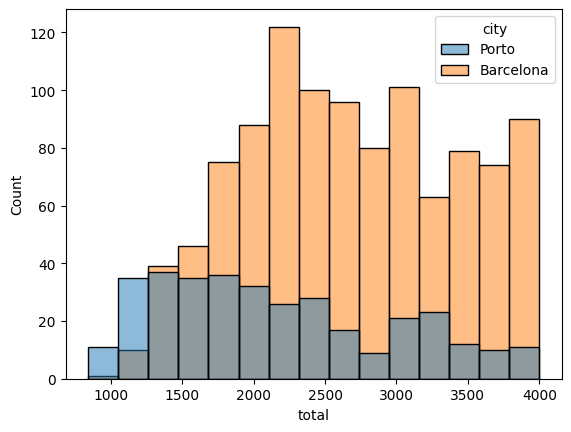

In [ ]:
sns.histplot(data = rent_house, x = 'total', hue = "city");

A opção de escolha dada apartir de uma premissa

Com a análise exploratória feita, podemos começar a filtrar os dados de acordo com nossas premissas.

Primeiro, vamos filtrar apenas Barcelona e Porto na coluna "Cidade":

In [ ]:
rent_house = rent_house.query ("city == 'Porto'")
rent_house.head()

,index,city,area,rooms,bathroom,parking_space,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0
16,16,Porto,188,2,3,8,-,accept,not furnished,0,3010.0,584.0,46.0,3640.0
28,28,Porto,150,3,2,2,13,accept,not furnished,1370,1800.0,250.0,23.0,3443.0
36,36,Porto,94,3,3,2,1,accept,not furnished,750,2200.0,192.0,28.0,3170.0


In [ ]:
rent_house.describe()

,index,area,rooms,bathroom,parking_space,rent_amount,property_tax,fire_insurance,total
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,2984.862974,128.889213,2.481050,1.597668,1.381924,1568.731778,91.655977,21.166181,2161.947522
std,1765.093849,684.179001,0.500371,0.701873,1.063713,687.146046,81.422431,10.449199,803.341044
min,1.000000,40.000000,2.000000,1.000000,0.000000,450.000000,0.000000,5.000000,843.000000
25%,1433.500000,60.000000,2.000000,1.000000,1.000000,1060.500000,39.500000,13.000000,1494.000000
50%,3052.000000,76.000000,2.000000,1.000000,1.000000,1350.000000,75.000000,18.000000,2017.000000
75%,4522.000000,101.500000,3.000000,2.000000,2.000000,2000.000000,120.500000,26.000000,2738.500000
max,6055.000000,12732.000000,3.000000,4.000000,8.000000,3500.000000,600.000000,53.000000,3994.000000


Depois filtramos quantidade de quartos entre 2 e 3:

In [ ]:
rent_house.groupby('floor').index.nunique().sort_values(ascending=False)

floor
-     77
1     52
3     51
2     31
4     26
7     20
5     16
6     13
11    11
9      9
8      7
10     6
12     6
15     5
13     4
17     3
16     2
14     1
18     1
19     1
51     1
Name: index, dtype: int64

Assim sucessivamente, podemos ir refinando os dados até chegar em um subconjunto que atende todas as premissas.

## Análise de Dados

Com os dados filtrados, podemos analisá-los para comparar Barcelona e Porto em termos de preço médio dos apartamentos:

E visualizar essas informações em um gráfico de barras:

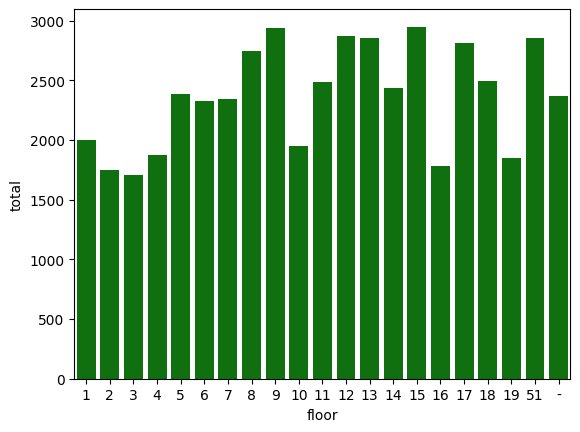

In [ ]:
agg_floor_price = rent_house.groupby("floor")['total'].agg('mean').reset_index()
sns.barplot(data = agg_floor_price, x= 'floor', y='total', color = 'green');

Analisando os gráficos, percebemos que apartamentos em andares mais altos tem preço médio menor em comparação.

## Insights e Decisão

Com todas as análises feitas, chegamos ao insight de que apartamentos no 16o andar em Porto atendem as premissas do cliente e tem um bom custo-benefício.


In [ ]:
sixteenth_floor = rent_house.query ('floor == 16')
sixteenth_floor.head()

,index,city,area,rooms,bathroom,parking_space,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1843,1843,Porto,100,2,1,0,16,accept,not furnished,550,900.0,61.0,12.0,1523.0
5175,5175,Porto,72,2,1,2,16,accept,not furnished,730,1200.0,89.0,16.0,2035.0


Temos duas opções que cabem no orçamento do cliente.

Dessa forma, utilizando Python e análise de dados, foi possível chegar a um apartamento que atende as necessidades do cliente com base nos dados disponíveis.

##Fim.
